In [1]:
!pip install statsbomb
!pip install kloppy
!pip install mplsoccer

  Using cached mplsoccer-0.0.21.tar.gz (33 kB)
  Created wheel for mplsoccer: filename=mplsoccer-0.0.21-py3-none-any.whl size=32698 sha256=7dceb07433ec7af85a3d1b722af4c54591e04667dc7f83350b5c482b45f2c58e
  Stored in directory: /Users/yamamuros83/Library/Caches/pip/wheels/a0/e6/5f/99d0830c048c6a9e4383a43d308192927e27c908f5db2e833d
Successfully built mplsoccer


In [21]:
import requests
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

import plotly.io as pio
pio.base_renderers = 'colab'


from kloppy import datasets
import statsbomb as sb

from mplsoccer.pitch import Pitch

In [3]:
BASE_URL = 'https://raw.githubusercontent.com/statsbomb/open-data/master/data'

# データの読み込み

## competition

In [4]:
comps_df = sb.Competitions().get_dataframe()

In [5]:
comps_df

,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
0,16,4,Europe,Champions League,male,2018/2019,2020-07-29T05:00,2020-07-29T05:00
1,16,1,Europe,Champions League,male,2017/2018,2020-07-29T05:00,2020-07-29T05:00
2,16,2,Europe,Champions League,male,2016/2017,2020-08-26T12:33:15.869622,2020-07-29T05:00
3,16,27,Europe,Champions League,male,2015/2016,2020-08-26T12:33:15.869622,2020-07-29T05:00
4,16,26,Europe,Champions League,male,2014/2015,2020-08-26T12:33:15.869622,2020-07-29T05:00
5,16,25,Europe,Champions League,male,2013/2014,2020-08-26T12:33:15.869622,2020-07-29T05:00
6,16,24,Europe,Champions League,male,2012/2013,2020-08-26T12:33:15.869622,2020-07-29T05:00
7,16,23,Europe,Champions League,male,2011/2012,2020-08-26T12:33:15.869622,2020-07-29T05:00
8,16,22,Europe,Champions League,male,2010/2011,2020-07-29T05:00,2020-07-29T05:00
9,16,21,Europe,Champions League,male,2009/2010,2020-07-29T05:00,2020-07-29T05:00


## matches

### 関数の定義

In [6]:
def get_matches_df(competition_id, season_id=None, comps_df=None):
    if season_id:
        matches_df = pd.DataFrame(requests.get(f'{BASE_URL}/matches/{competition_id}/{season_id}.json').json())
    else:
        matches_df = pd.concat([pd.DataFrame(requests.get(f'{BASE_URL}/matches/{competition_id}/{season_id}.json').json()) for season_id in comps_df[comps_df.competition_id==competition_id].season_id.tolist()])
    
    c_list = ['competition', 'season', 'home_team', 'away_team', 'stadium', 'competition_stage']
    if competition_id == 2:
        c_list.remove('stadium')
    for c in c_list:
        if c in ['stadium', 'competition_stage']:
            key_list = ['id', 'name']
            c_fixed_list = [f'{c}_{k}' for k in key_list]

        else:
            key_list = [f'{c}_{k}' for k in ['id', 'name']]
            c_fixed_list = key_list
            
        for k, c_fixed in zip(key_list, c_fixed_list):
            matches_df[c_fixed] = matches_df[c].apply(lambda x: x[k] if type(x)==dict else None)
           
    matches_df = matches_df.drop(c_list+['metadata','referee'], axis=1).sort_values('match_date').reset_index(drop=True)

    return matches_df

### 実行
- competition_id = 大会id、上の表から選択
- season_id = シーズンid、(必要であれば)

In [7]:
competition_id = 11
season_id = 22

get_matches_df(competition_id=competition_id, season_id=season_id, comps_df=comps_df)

,match_id,match_date,kick_off,home_score,away_score,match_status,last_updated,match_week,competition_id,competition_name,season_id,season_name,home_team_id,home_team_name,away_team_id,away_team_name,stadium_id,stadium_name,competition_stage_id,competition_stage_name
0,69286,2010-08-29,19:00:00.000,0,3,available,2020-07-29T05:00,1,11,La Liga,22,2010/2011,1217,Racing Santander,217,Barcelona,4636,Campos de Sport de El Sardinero,1,Regular Season
1,69287,2010-09-11,18:00:00.000,0,2,available,2020-07-29T05:00,2,11,La Liga,22,2010/2011,217,Barcelona,1218,Hércules,342,Camp Nou,1,Regular Season
2,69269,2010-09-19,19:00:00.000,1,2,available,2020-07-29T05:00,3,11,La Liga,22,2010/2011,212,Atlético Madrid,217,Barcelona,625,Estadio Vicente Calderón,1,Regular Season
3,69236,2010-10-03,19:00:00.000,1,1,available,2020-07-29T05:00,6,11,La Liga,22,2010/2011,217,Barcelona,1043,Mallorca,342,Camp Nou,1,Regular Season
4,69260,2010-10-16,20:00:00.000,2,1,available,2020-07-29T05:00,7,11,La Liga,22,2010/2011,217,Barcelona,207,Valencia,342,Camp Nou,1,Regular Season
5,69263,2010-10-23,18:00:00.000,0,2,available,2020-07-29T05:00,8,11,La Liga,22,2010/2011,395,Real Zaragoza,217,Barcelona,4457,Estadio de la Romareda,1,Regular Season
6,69289,2010-10-30,22:00:00.000,5,0,available,2020-07-29T05:00,9,11,La Liga,22,2010/2011,217,Barcelona,213,Sevilla,342,Camp Nou,1,Regular Season
7,69270,2010-11-07,19:00:00.000,1,3,available,2020-07-29T05:00,10,11,La Liga,22,2010/2011,216,Getafe,217,Barcelona,354,Coliseum Alfonso Pérez,1,Regular Season
8,69308,2010-11-13,22:00:00.000,3,1,available,2020-07-29T05:00,11,11,La Liga,22,2010/2011,217,Barcelona,222,Villarreal,342,Camp Nou,1,Regular Season
9,69306,2010-11-20,20:00:00.000,0,8,available,2020-07-29T05:00,12,11,La Liga,22,2010/2011,403,Almería,217,Barcelona,4657,Estadio de los Juegos Mediterráneos,1,Regular Season


## dataset
- match_id = 試合id（上記から見たい試合を選択）

In [8]:
match_id = 69299

dataset = datasets.load(dataset_name='statsbomb', match_id=match_id)

/Users/yamamuros83/.pyenv/versions/anaconda3-5.3.1/envs/spoana/lib/python3.8/site-packages/kloppy/infra/datasets/event/statsbomb.py:11: UserWarning: 

You are about to use StatsBomb public data.
By using this data, you are agreeing to the user agreement. 
The user agreement can be found here: https://github.com/statsbomb/open-data/blob/master/LICENSE.pdf

  warnings.warn(


## lineups

In [9]:
metadata = dataset.metadata
home_team, away_team = metadata.teams

対戦チームの表示

In [10]:
print(f"{home_team.ground} - {home_team}")
print(f"{away_team.ground} - {away_team}")

home - Real Madrid
away - Barcelona


出場メンバー

In [11]:
lineups_df = pd.concat(
    [
        pd.DataFrame(data=[
            {'player_id':player.player_id, 'player_name':player.name, 'jersey_no':player.jersey_no, 'starting_flg':player.starting, 'team_id':team.team_id, 'team_name':team.name} 
            for player in team.players]
        ) 
        for team in metadata.teams
    ], ignore_index=True
)

lineups_df

,player_id,player_name,jersey_no,starting_flg,team_id,team_name
0,2995,Ángel Fabián Di María Hernández,22,True,220,Real Madrid
1,3181,Lassana Diarra,10,False,220,Real Madrid
2,3496,Mesut Özil,23,True,220,Real Madrid
3,5201,Sergio Ramos García,4,True,220,Real Madrid
4,5207,Cristiano Ronaldo dos Santos Aveiro,7,True,220,Real Madrid
5,5552,Marcelo Vieira da Silva Júnior,12,True,220,Real Madrid
6,5566,Sami Khedira,24,True,220,Real Madrid
7,10805,Ricardo Alberto Silveira de Carvalho,2,True,220,Real Madrid
8,11179,Iker Casillas Fernández,1,True,220,Real Madrid
9,19677,Karim Benzema,9,True,220,Real Madrid


## events

In [12]:
from kloppy import to_pandas

df = pd.merge(to_pandas(dataset), lineups_df, on=['player_id', 'team_id'], how='left')

df.head()

,event_id,event_type,result,success,period_id,timestamp,end_timestamp,ball_state,ball_owning_team,team_id,player_id,coordinates_x,coordinates_y,end_coordinates_x,end_coordinates_y,receiver_player_id,player_name,jersey_no,starting_flg,team_name
0,ac926dec-ffa1-44ea-a734-dfc0a565a6df,GENERIC:Starting XI,None,None,1,0.000,NaN,alive,217,217,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,c9bda184-571e-4482-bf23-990874e40b0d,GENERIC:Starting XI,None,None,1,0.000,NaN,alive,217,220,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b3dae79e-facf-499b-a1cb-2b6c5c59c81c,GENERIC:Half Start,None,None,1,0.000,NaN,alive,217,217,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7493688e-145f-4458-bd76-549bc7f21bec,GENERIC:Half Start,None,None,1,0.000,NaN,alive,217,220,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,78b837e8-5477-46cf-a401-d4cae5895637,PASS,COMPLETE,True,1,0.724,1.4029,alive,220,220,19677,60.95,40.95,61.35,42.95,3496,Karim Benzema,9.0,True,Real Madrid


# 可視化（基礎集計）

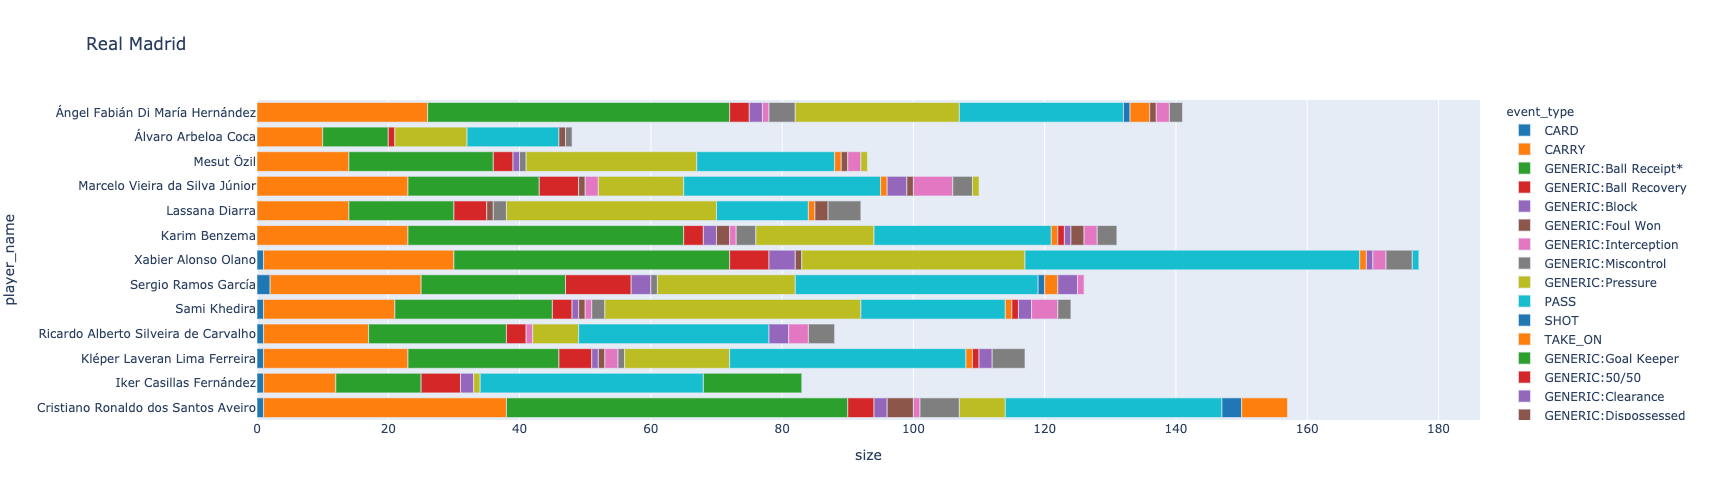

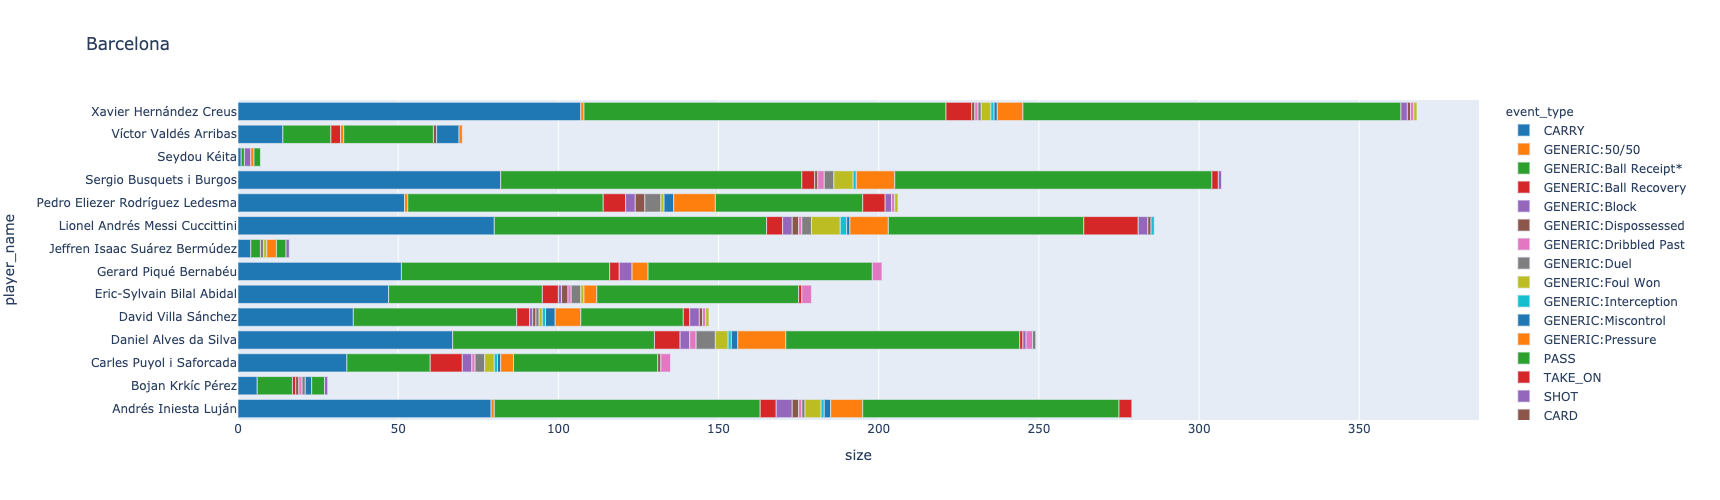

In [24]:
for team_name in [home_team.name, away_team.name]:
    fig = px.bar(
        df[df.team_name==team_name].groupby(['team_name', 'player_name', 'event_type'], as_index=False).size(),
        y='player_name', x='size', color='event_type', orientation='h',
        height=500, width=1000, title=team_name, color_discrete_sequence=px.colors.qualitative.D3
    )
    iplot(fig)

# 可視化（ピッチ上へ）

## Heatmap of touches each player

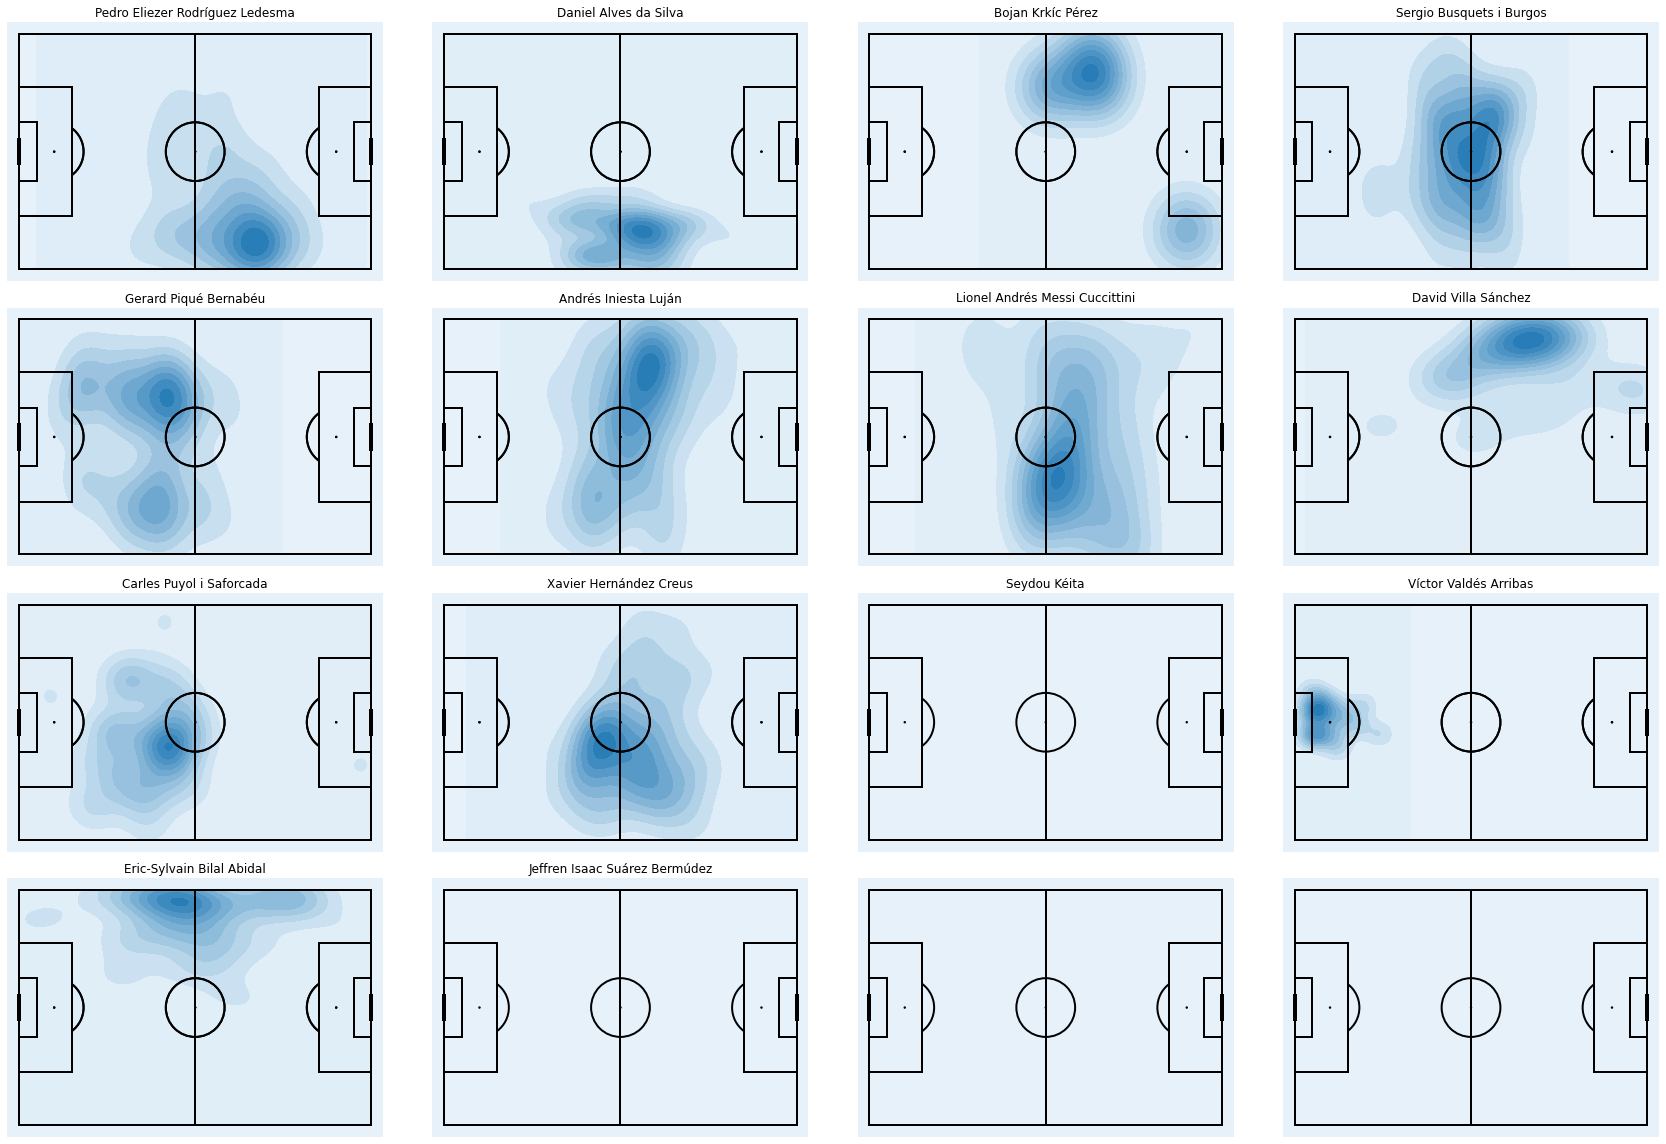

In [25]:
n_players = len(lineups_df[lineups_df.team_name=='Barcelona'])
n_cols = 4
n_rows = math.ceil(n_players / n_cols)

pitch = Pitch(pitch_color='#e7f1fa', figsize=(n_cols*6, n_rows*4), layout=(n_rows, n_cols), line_zorder=1, line_color='black', pitch_type="statsbomb")
fig, axes = pitch.draw()

for i, (player_id, player_name) in enumerate(lineups_df[lineups_df.team_name=='Barcelona'][['player_id', 'player_name']].values):
    df_tmp = df[df.player_id==player_id].copy()
    ax = axes[math.floor(i/n_cols), i%n_cols]
    if len(df_tmp) > 20:
        pitch.draw(ax)
        pitch.kdeplot(
            df_tmp.dropna()['coordinates_x'],
            df_tmp.dropna()['coordinates_y'],
            ax=ax,
            shade=True,
            n_levels=10,
        )
    
    ax.set_title(player_name)

## Heatmap of Pressure each Team

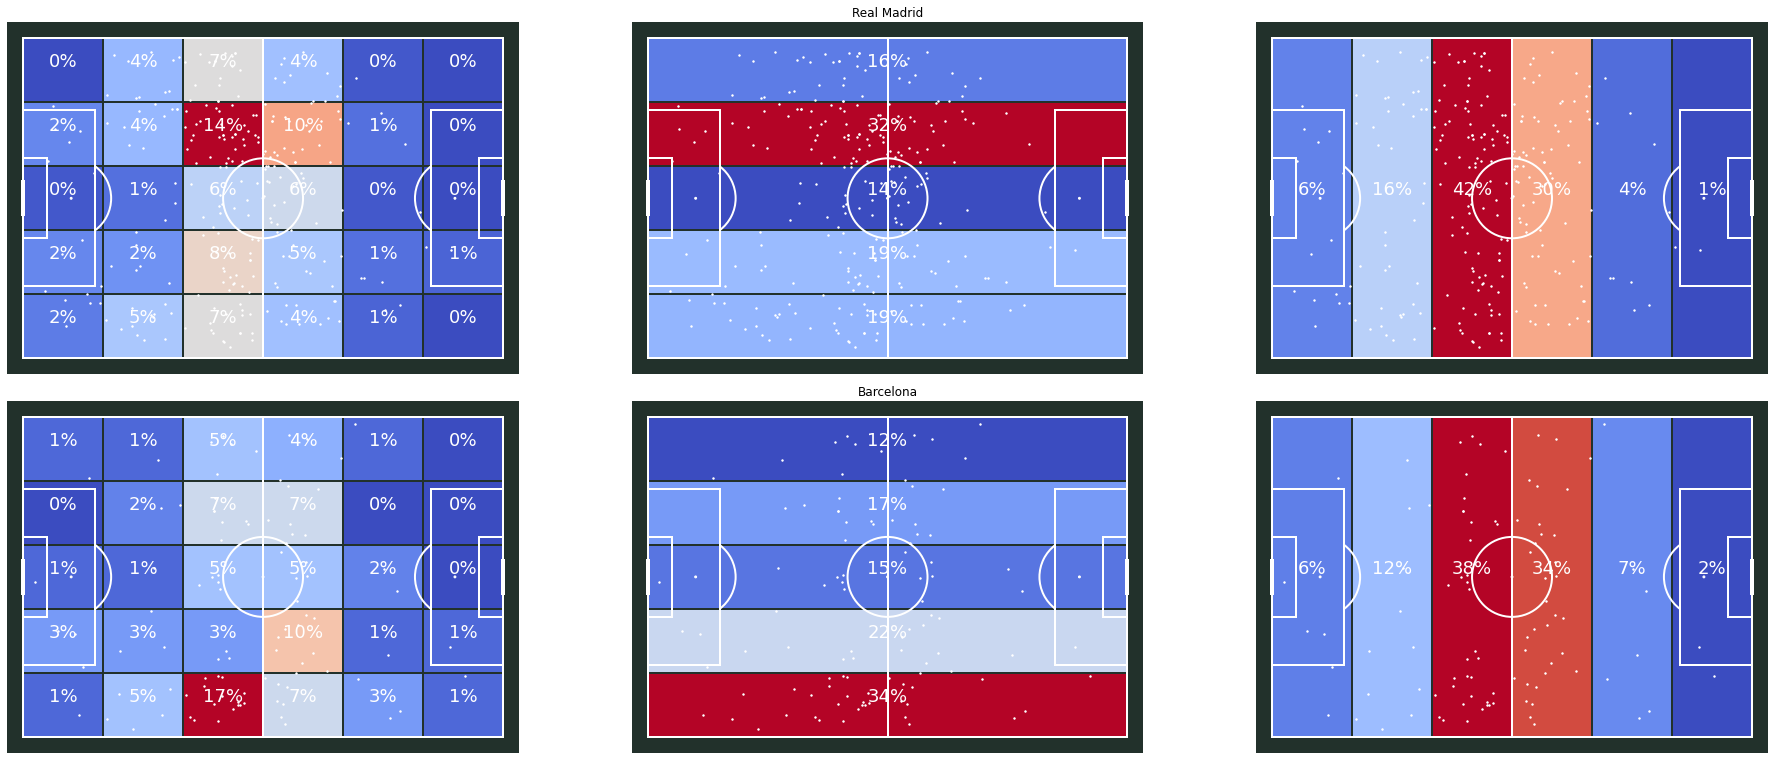

In [26]:
pitch = Pitch(pitch_type='statsbomb', figsize=(9*3, 16/3*2), layout=(2, 3), line_zorder=2, pitch_color='#22312b', line_color='white')

# draw
fig, axes = pitch.draw()
# heatmap specified by (nx, ny) for horizontal pitch
bins_list = [(6, 5), (1, 5), (6, 1)]
for i, team_name in enumerate(lineups_df.team_name.unique()):
    df_tmp = df[(df.event_type=='GENERIC:Pressure')&(df.team_name==team_name)]
    for j, bins in enumerate(bins_list):
        ax = axes[i, j]
        bin_statistic = pitch.bin_statistic(df_tmp['coordinates_x'], df_tmp['coordinates_y'], statistic='count', bins=bins)
        # draw
        pitch.heatmap(bin_statistic, ax=ax, cmap='coolwarm', edgecolors='#22312b')
        pitch.scatter(df_tmp['coordinates_x'], df_tmp['coordinates_y'], c='white', s=2, ax=ax)
        # replace raw counts with percentages and add percentage sign (note immutable named tuple so used _replace)
        bin_statistic['statistic'] = (pd.DataFrame((bin_statistic['statistic'] / bin_statistic['statistic'].sum()))
                                      .applymap(lambda x: '{:.0%}'.format(x))
                                      .values)
        pitch.label_heatmap(bin_statistic, color='white', fontsize=18, ax=ax, ha='center', va='bottom')
        
        if j==1:
            ax.set_title(team_name)

## pass Network

## Shot map each team

In [27]:
from mplsoccer.statsbomb import read_event, EVENT_SLUG
df_tmp = read_event(f'{EVENT_SLUG}/{match_id}.json', related_event_df=False, shot_freeze_frame_df=False, tactics_lineup_df=False)['event']

/Users/yamamuros83/.pyenv/versions/anaconda3-5.3.1/envs/spoana/lib/python3.8/site-packages/mplsoccer/statsbomb.py:120: UserWarning:

Please be responsible with Statsbomb data.Register your details on https://www.statsbomb.com/resource-centreand read the User Agreement carefully (on the same page).



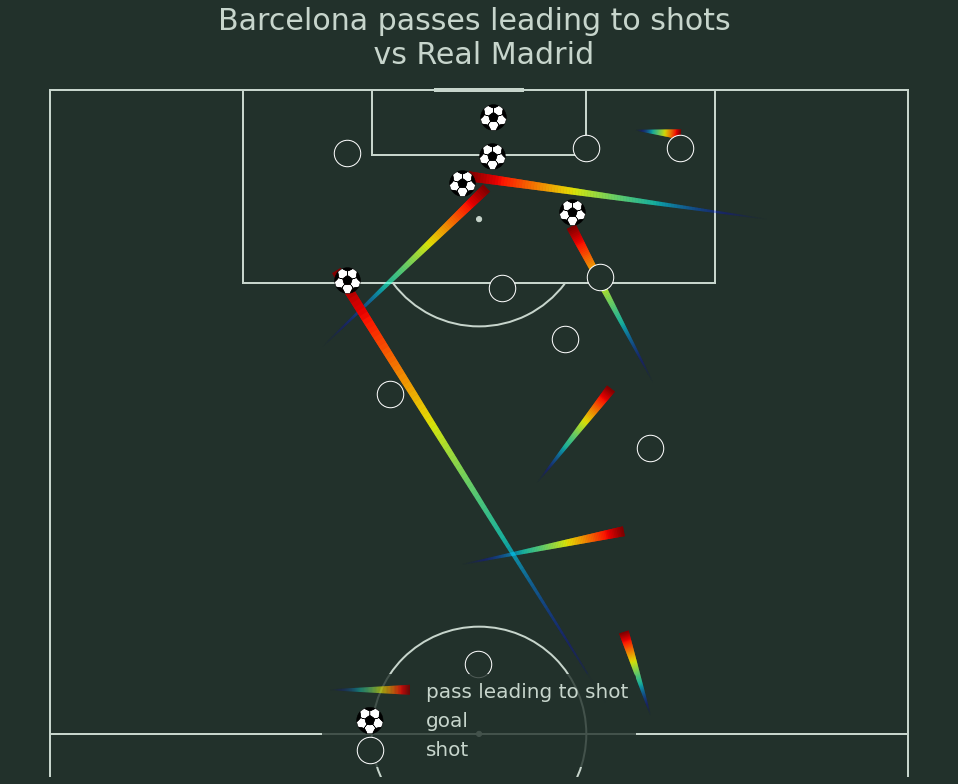

In [28]:
from matplotlib import rcParams
rcParams['text.color'] = '#c7d5cc'

team_name, against_team_name = 'Barcelona', 'Real Madrid'

df_pass = df_tmp.loc[(df_tmp.pass_assisted_shot_id.notnull()) & (df_tmp.team_name == team_name),
                 ['x', 'y', 'end_x', 'end_y', 'pass_assisted_shot_id']]

df_shot = df_tmp.loc[(df_tmp.type_name == 'Shot') & (df_tmp.team_name == team_name),
                 ['id', 'x', 'y' , 'outcome_name', 'shot_statsbomb_xg']].rename({'id': 'pass_assisted_shot_id'}, axis=1)

df_pass = df_pass.merge(df_shot, how='left').drop('pass_assisted_shot_id', axis=1)

mask_goal = df_pass.outcome_name == 'Goal'

# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', orientation='vertical', pitch_color='#22312b', line_color='#c7d5cc',
              figsize=(16, 11), view='half', pad_top=2, tight_layout=True)
fig, ax = pitch.draw()

# Plot the completed passes
pitch.lines(df_pass.x, df_pass.y, df_pass.end_x, df_pass.end_y,
            lw=10, transparent=True, comet=True, cmap='jet',
            label='pass leading to shot', ax=ax)

# Plot the goals
pitch.scatter(df_shot[df_shot.outcome_name=='Goal'].x, df_shot[df_shot.outcome_name=='Goal'].y, s=700,
              marker='football', edgecolors='black', c='white', zorder=2,
              label='goal', ax=ax)
pitch.scatter(df_shot[df_shot.outcome_name!='Goal'].x, df_shot[df_shot.outcome_name!='Goal'].y,
              edgecolors='white', c='#22312b', s=700, zorder=2,
              label='shot', ax=ax)
# Set the title
ax.set_title(f'{team_name} passes leading to shots \n vs {against_team_name}', fontsize=30)

# set legend
ax.legend(facecolor='#22312b', edgecolor='None', fontsize=20, loc='lower center', handlelength=4)

# Set the figure facecolor
fig.set_facecolor('#22312b')